<a href="https://colab.research.google.com/github/AtSourav/AE-n-VAE-with-CB-loss-on-stl10/blob/main/AE_cifar10_CBloss_HeNormal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import math
import tensorflow_datasets as tfds
from keras import losses
from keras import layers
from keras import utils
from keras import metrics
from keras import backend as K
from keras import initializers

import os
import random
import matplotlib.pyplot as plt

In [2]:
img_ht = 32
img_wd = 32

input_size = (img_ht,img_wd,3)
latent_dim = 200
batch_size = 128

initializer = initializers.HeNormal(seed=100)

In [3]:
ds = tfds.load('cifar10', split='train')
ds2= tfds.load('cifar10', split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteQ94EWX/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteQ94EWX/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [4]:
ds_to_np = list(ds.as_numpy_iterator())
ds2_to_np = list(ds2.as_numpy_iterator())

In [5]:
img_train = np.array([x['image'] for x in ds_to_np])
img_valid = np.array([x['image'] for x in ds2_to_np])

img_train = img_train/255
img_valid = img_valid/255

In [8]:
encoder_input = keras.Input(shape=input_size)

x = layers.Conv2D(64, 2, padding="valid", kernel_initializer=initializer)(encoder_input)
x = layers.ReLU()(x)

x = layers.Conv2D(64, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)

x = layers.Conv2D(128, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 1, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 1, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 1, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 1, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 1, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 1, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(1024, 2, padding="valid", kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(3*latent_dim)(x)
x = layers.ReLU()(x)

x = layers.Dense(2*latent_dim)(x)
x = layers.ReLU()(x)


z = layers.Dense(latent_dim, name="z")(x)

encoder = keras.Model(encoder_input, z, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 31, 31, 64)        832       
                                                                 
 re_lu_44 (ReLU)             (None, 31, 31, 64)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 30, 30, 64)        16448     
                                                                 
 re_lu_45 (ReLU)             (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                           

In [9]:
latent_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(2*latent_dim)(latent_input)
x = layers.ReLU()(x)

x = layers.Dense(3*latent_dim)(x)
x = layers.ReLU()(x)

x = layers.Dense(4*latent_dim)(x)
x = layers.ReLU()(x)

x = layers.Dense(2*2*1024)(x)
x = layers.ReLU()(x)

x = layers.Reshape((2,2,1024))(x)

x = layers.Conv2DTranspose(1024, 1, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 1, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 2, padding='valid', kernel_initializer=initializer)(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 2, padding='valid', kernel_initializer=initializer)(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(256, 1, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(256, 2, padding='valid', kernel_initializer=initializer)(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(256, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(256, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='bilinear')(x)

x = layers.Conv2DTranspose(128, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(128, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(128, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(128, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='bilinear')(x)

x = layers.Conv2D(128, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 1, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(64, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(64, 2, padding='valid', kernel_initializer=initializer)(x)
x = layers.ReLU()(x)

decoder_output = layers.Conv2D(3, 1, activation='sigmoid', padding='valid', kernel_initializer=initializer)(x)

decoder = keras.Model(latent_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200)]             0         
                                                                 
 dense_4 (Dense)             (None, 400)               80400     
                                                                 
 re_lu_68 (ReLU)             (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 600)               240600    
                                                                 
 re_lu_69 (ReLU)             (None, 600)               0         
                                                                 
 dense_6 (Dense)             (None, 800)               480800    
                                                                 
 re_lu_70 (ReLU)             (None, 800)               0   

In [10]:
decoder_out = decoder(encoder(encoder_input))
AE = keras.Model(encoder_input, decoder_out, name='AE')

AE.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 encoder (Functional)        (None, 200)               9610544   
                                                                 
 decoder (Functional)        (None, 32, 32, 3)         9199307   
                                                                 
Total params: 18809851 (71.75 MB)
Trainable params: 18809851 (71.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
l_cutoff = 0.495
u_cutoff = 0.505

def norm_CB(z):

    gate = math.logical_and(math.greater(z,l_cutoff), math.greater(u_cutoff,z))

    z_reg = tf.where(gate, l_cutoff, z)

    norm_reg = (2*math.atanh(1 - 2*z_reg))/(1 - 2*z_reg)
    norm_taylor = 2.0 + (8.0/3.0)*math.pow(z-0.5,2) + (32.0/5.0)*math.pow(z-0.5,4)  +  (128.0/7.0)*math.pow(z-0.5,6)


    norm = tf.where(gate, norm_taylor, norm_reg)

    return norm

def CB_logloss(true, pred):
  true = layers.Flatten()(true)
  pred = layers.Flatten()(pred)
  bce = losses.binary_crossentropy(true,pred)

  corrected_loss_tensor = bce + tf.reduce_mean(math.log(norm_CB(pred)), axis=-1 )


  return tf.reduce_mean(corrected_loss_tensor)

In [13]:
K.clear_session()

In [15]:
optim = keras.optimizers.Adam(learning_rate = 0.0001)
AE.compile(optimizer=optim,loss=CB_logloss)
history = AE.fit(img_train, img_train, batch_size=batch_size, validation_data=(img_valid, img_valid), epochs=15, steps_per_epoch=None)

Epoch 1/15
391/391 [==============================] - 37s 65ms/step - loss: 1.3830 - val_loss: 1.3704
Epoch 2/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3625 - val_loss: 1.3618
Epoch 3/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3604 - val_loss: 1.3610
Epoch 4/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3603 - val_loss: 1.3593
Epoch 5/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3598 - val_loss: 1.3585
Epoch 6/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3569 - val_loss: 1.3541
Epoch 7/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3533 - val_loss: 1.3536
Epoch 8/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3528 - val_loss: 1.3535
Epoch 9/15
391/391 [==============================] - 25s 63ms/step - loss: 1.3527 - val_loss: 1.3526
Epoch 10/15
391/391 [==============================] - 25s 63ms/step - loss: 1.350

In [16]:
optim = keras.optimizers.Adam(learning_rate = 0.00005)
AE.compile(optimizer=optim,loss=CB_logloss, metrics =[metrics.MeanSquaredError()])
history2 = AE.fit(img_train, img_train, batch_size=batch_size, validation_data=(img_valid, img_valid), epochs=10, steps_per_epoch=None)

Epoch 1/10
391/391 [==============================] - 38s 67ms/step - loss: 1.3446 - mean_squared_error: 0.0355 - val_loss: 1.3449 - val_mean_squared_error: 0.0355
Epoch 2/10
391/391 [==============================] - 25s 64ms/step - loss: 1.3444 - mean_squared_error: 0.0353 - val_loss: 1.3449 - val_mean_squared_error: 0.0351
Epoch 3/10
391/391 [==============================] - 25s 63ms/step - loss: 1.3444 - mean_squared_error: 0.0353 - val_loss: 1.3449 - val_mean_squared_error: 0.0351
Epoch 4/10
391/391 [==============================] - 25s 63ms/step - loss: 1.3443 - mean_squared_error: 0.0353 - val_loss: 1.3449 - val_mean_squared_error: 0.0355
Epoch 5/10
391/391 [==============================] - 25s 63ms/step - loss: 1.3443 - mean_squared_error: 0.0352 - val_loss: 1.3447 - val_mean_squared_error: 0.0353
Epoch 6/10
391/391 [==============================] - 25s 63ms/step - loss: 1.3442 - mean_squared_error: 0.0352 - val_loss: 1.3447 - val_mean_squared_error: 0.0355
Epoch 7/10
391/3

In [ ]:
optim = keras.optimizers.Adam(learning_rate = 0.0000075)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, start_from_epoch=10, restore_best_weights=True)
AE.compile(optimizer=optim,loss=CB_logloss)
history3 = AE.fit(img_train, img_train, batch_size=batch_size, validation_data=(img_valid, img_valid), epochs=50, callbacks=[callback], steps_per_epoch=None)

Epoch 1/50
391/391 [==============================] - 38s 67ms/step - loss: 1.3419 - val_loss: 1.3424
Epoch 2/50
391/391 [==============================] - 25s 63ms/step - loss: 1.3419 - val_loss: 1.3424
Epoch 3/50
391/391 [==============================] - 25s 63ms/step - loss: 1.3418 - val_loss: 1.3424
Epoch 4/50
391/391 [==============================] - 25s 63ms/step - loss: 1.3418 - val_loss: 1.3424
Epoch 5/50
391/391 [==============================] - 25s 63ms/step - loss: 1.3418 - val_loss: 1.3423
Epoch 6/50
391/391 [==============================] - 25s 63ms/step - loss: 1.3417 - val_loss: 1.3423
Epoch 7/50
327/391 [========================>.....] - ETA: 3s - loss: 1.3417

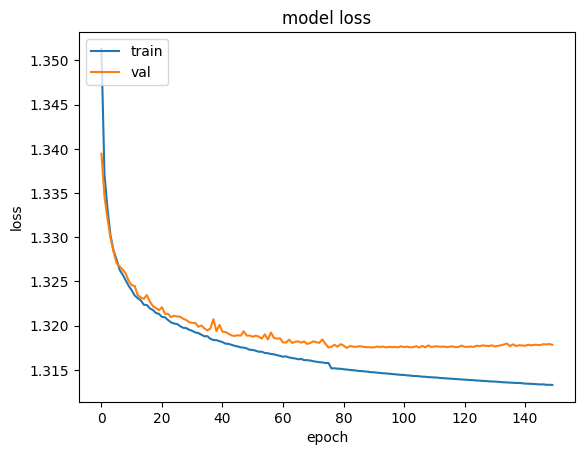

In [ ]:
plt.plot(history.history['loss']+history2.history['loss'])
plt.plot(history.history['val_loss']+history2.history['val_loss'])
#plt.plot(history.history['mean_squared_error']+history2.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error']+history2.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

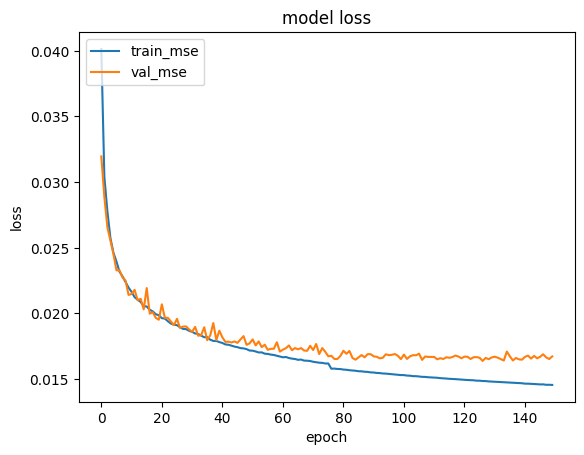

In [ ]:
#plt.plot(history.history['loss']+history2.history['loss'])
#plt.plot(history.history['val_loss']+history2.history['val_loss'])
plt.plot(history.history['mean_squared_error']+history2.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']+history2.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_mse', 'val_mse'], loc='upper left')
plt.show()

In [ ]:
def plot_reconstruction(set, name,seed_val, epochs):     #name should be either 'training' or 'validation'
  np.random.seed(seed_val)

  tg_indices = np.random.randint(0,set.shape[0],size = 16)
  img_sample = tf.convert_to_tensor(np.array(set)[tg_indices])
  z_sample = encoder(img_sample)
  img_recon = decoder(z_sample)

  recon = plt.figure(figsize=(9,4))
  recon.suptitle('Reconstructed images (right) from the ' + name + '-set after ' + str(epochs) + ' epochs: no regularisation in the encoder, decoder, latent_dim =' + str(latent_dim), fontweight= 'bold', y=0.93)

  recon.tight_layout()

  for i in range(36):
    recon.add_subplot(4,9,i+1)
    j = int(np.floor(i/9))
    if (i%9) <4:
      img = set[tg_indices[j*4 + (i%9)]]
      plt.imshow(img)
      plt.axis('off')
    elif (i%9)==4:
      img = np.ones((32,32,3))
      plt.imshow(img)
      plt.axis('off')
    else:
      img = img_recon[j*4 + (i%9) - 5]
      plt.imshow(img)
      plt.axis('off')

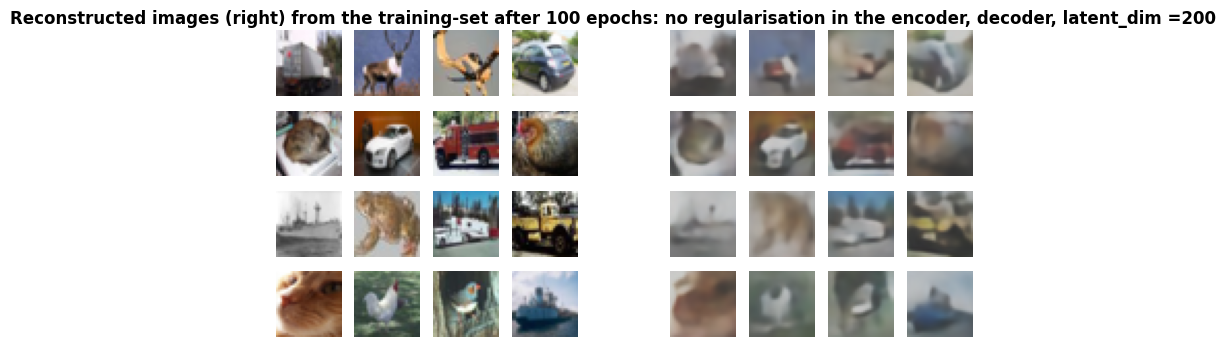

In [ ]:
plot_reconstruction(img_train, 'training',123,150)

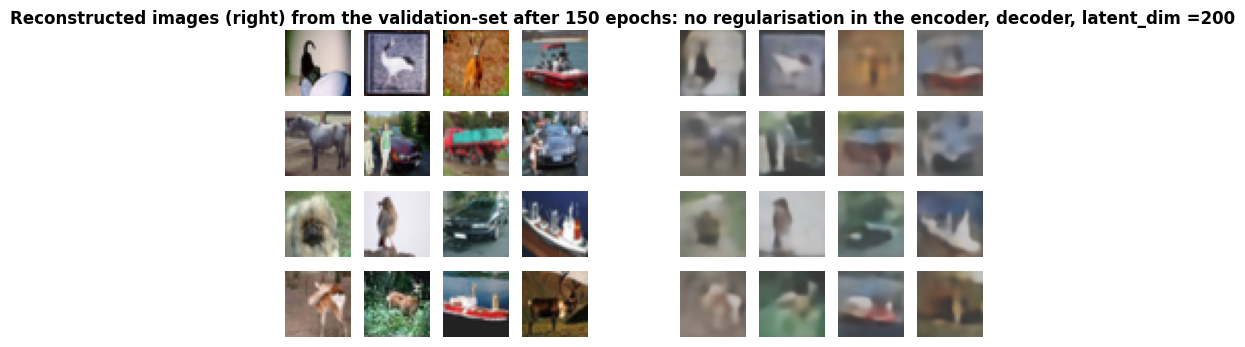

In [ ]:
plot_reconstruction(img_valid,'validation',123,150)

We waited for the network (with the same architecture that we optimised with mse loss) to start overtraining and then the results are above. The reconstructed images have worse colour depth (they look washed out), but it seems like they look a little less blurry.